<center> <font size="+1"> TP3 SIC 4102 </font> </center>

# Basis pursuit, Lasso

In [1]:
# Importer pylab, prévoir un tracé des figures en ligne.
# changer ci-dessous
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import tp2a

$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation (taille $m$), $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On considère un système sous-déterminé ($m\leq n$).

## Observations linéaires parfaites

Générer un signal $\bx_0$ parcimonieux de taille $n$ (de l'ordre de 1000) et un vecteur de $m<n$ observations $\by_0=\bA\bx_0$ pour une matrice $\bA$ tirée au hasard selon une loi gaussienne. 

Text(0.5, 1.0, 'y_0 : observations sans bruit')

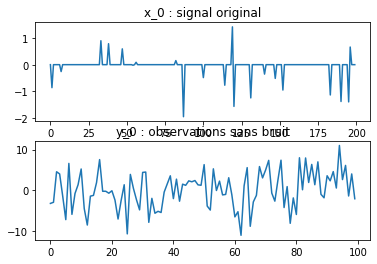

In [2]:
m, n = 100, 200

s = 0.1 #taux de parcimonie et signal parcimonieux
x0 = np.asarray([0 if np.random.rand()>s else np.random.randn() for i in range(n)])

A = np.random.randn(m,n)
y0 = A.dot(x0)

Fig_donnees, Ax_donnees = plt.subplots(2, 1)
Ax_donnees[0].plot(x0)
Ax_donnees[0].set_title('x_0 : signal original')
Ax_donnees[1].plot(y0)
Ax_donnees[1].set_title('y_0 : observations sans bruit')

Réécrire la fonction `tp2a.educ.least_l2_pen` qui renvoit $\hat{\bx}_{2} = \Argmin_{\bx} \frac{1}{2}\|\bx\|_2^2 \st \bA\bx = \by$.

In [3]:
# voir tp2a.educ.least_l2_pen

Réécrire la fonction `tp2a.lpalgs.least_l1_pen` qui renvoie $\hat{\bx}_\mathrm{bp} = \Argmin_{\bx} \|\bx\|_1 \st \bA\bx = \by$

<u>Indication</u>: le problème se transforme en un LP.

In [4]:
# voir tp2a.lpalgs.least_l1_pen

Regarder ce que donnent $\hat{\bx}_2$ et $\hat{\bx}_{\mathrm{bp}}$ lorsque appliqués aux données $\by_0$.

No noise:: norm(x0 - xhat2): 3.31 	 1/n*norm()^2: 0.0548
No noise:: norm(x0 - xbp): 9.13e-08  	 1/n*norm()^2: 4.17e-17


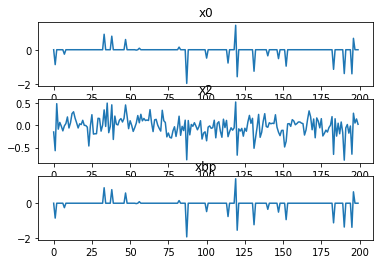

In [5]:
xhat2 = tp2a.educ.least_l2_pen(A, y0)
xbp = tp2a.lpalgs.least_l1_pen(A, y0)

Fig_LeastPen, Ax_LeastPen = plt.subplots(3, 1)
Ax_LeastPen[0].plot(x0)
Ax_LeastPen[0].set_title('x0')
Ax_LeastPen[1].plot(xhat2)
Ax_LeastPen[1].set_title('x2')
Ax_LeastPen[2].plot(xbp)
Ax_LeastPen[2].set_title('xbp')

print('No noise:: norm(x0 - xhat2): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'
      .format(np.linalg.norm(x0-xhat2),1/n*np.linalg.norm(x0-xhat2)**2))
print('No noise:: norm(x0 - xbp): {0:2.3g}  \t 1/n*norm()^2: {1:.3g}'
      .format(np.linalg.norm(x0-xbp),1/n*np.linalg.norm(x0-xbp)**2))

## Cas bruité et régularisation $\ell_1$ (LASSO)

Reprendre les données précédentes et bruiter les observations pour qu'elles correspondent à $\by=\bA\bx_0 + \be$.

Text(0.5, 1.0, 'y : observations bruitees')

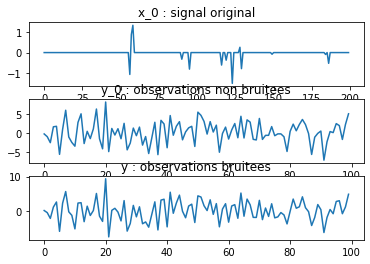

In [6]:
m, n = 100, 200

s = 0.1 #taux de parcimonie et signal parcimonieux
x0 = np.asarray([0 if np.random.rand()>s else np.random.randn() for i in range(n)])

A = np.random.randn(m,n)
y0 = A.dot(x0)
#### ajout de bruit sur les observations
Py = (y0**2).sum()/m
snr_dB = +20
sigma_e = np.sqrt(Py*np.exp(-snr_dB/10))
e = sigma_e*np.random.randn(m)
y = y0 + e

Fig_donnees, Ax_donnees = plt.subplots(3, 1)
Ax_donnees[0].plot(x0)
Ax_donnees[0].set_title('x_0 : signal original')
Ax_donnees[1].plot(y0)
Ax_donnees[1].set_title('y_0 : observations non bruitees')
Ax_donnees[2].plot(y)
Ax_donnees[2].set_title('y : observations bruitees')

Tester ce que donnent $\hat{\bx}_{2}$ et $\hat{\bx}_{\mathrm{bp}}$.

With noise:: norm(x0 - xhat2): 2.16  1/n*norm()^2: 0.0232
With noise:: norm(x0 - xbp):   1.31  1/n*norm()^2: 0.00856


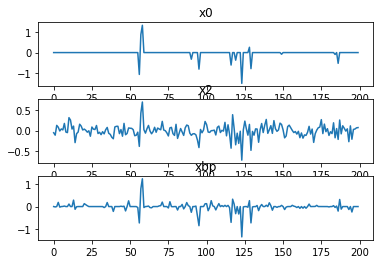

In [7]:
xhat2 = tp2a.educ.least_l2_pen(A, y)
xbp = tp2a.lpalgs.least_l1_pen(A, y)

Fig_LeastPen, Ax_LeastPen = plt.subplots(3, 1)
Ax_LeastPen[0].plot(x0)
Ax_LeastPen[0].set_title('x0')
Ax_LeastPen[1].plot(xhat2)
Ax_LeastPen[1].set_title('x2')
Ax_LeastPen[2].plot(xbp)
Ax_LeastPen[2].set_title('xbp')

print('With noise:: norm(x0 - xhat2): {0:2.3g}  1/n*norm()^2: {1:.3g}'
      .format(np.linalg.norm(x0-xhat2),1/n*np.linalg.norm(x0-xhat2)**2))
print('With noise:: norm(x0 - xbp):   {0:2.3g}  1/n*norm()^2: {1:.3g}'
      .format(np.linalg.norm(x0-xbp),1/n*np.linalg.norm(x0-xbp)**2))

On fournit la fonction `tp2a.proxalgs.lasso(A, y, lamb)` qui renvoie $\hat{\bx}_{\mathrm{lasso}}=\Argmin_\bx \|\by - \bA\bx\|_2^2 + \lambda\|\bx\|_1$. Importer cette fonction.

Comparer $\hat{\bx}_{\mathrm{lasso}}$ avec $\hat{\bx}_{\mathrm{bp}}$.

With noise 	 norm(x0 - xlasso): 2.34 	 1/n*norm()^2: 0.0273


Text(0.5, 1.0, 'xlasso')

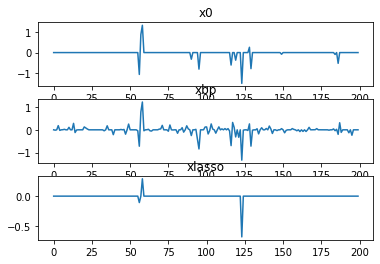

In [8]:
lamblasso = 95
xlasso = tp2a.proxalgs.lasso(A, y, lamblasso)

print('With noise \t norm(x0 - xlasso): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xlasso),1/n*np.linalg.norm(x0-xlasso)**2))

Fig_lasso, Ax_lasso = plt.subplots(3, 1)
Ax_lasso[0].plot(x0)
Ax_lasso[0].set_title('x0')
Ax_lasso[1].plot(xbp)
Ax_lasso[1].set_title('xbp')
Ax_lasso[2].plot(xlasso)
Ax_lasso[2].set_title('xlasso')